In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical variables
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation
from sklearn.tree import plot_tree  # To visualize the decision tree


In [21]:
import pandas as pd
import zipfile
import io
import requests

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download the ZIP file
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# List all files inside the ZIP
zip_file.namelist()


['bank-additional/',
 'bank-additional/.DS_Store',
 '__MACOSX/',
 '__MACOSX/bank-additional/',
 '__MACOSX/bank-additional/._.DS_Store',
 'bank-additional/.Rhistory',
 'bank-additional/bank-additional-full.csv',
 'bank-additional/bank-additional-names.txt',
 'bank-additional/bank-additional.csv',
 '__MACOSX/._bank-additional']

In [22]:
# Extract and read the correct CSV file
with zip_file.open("bank-additional/bank-additional-full.csv") as file:
    df = pd.read_csv(file, sep=';')

# Display first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable


In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)


Missing Values in Dataset:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [25]:
# Encode categorical variables using Label Encoding
encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

# Display first 5 rows after encoding
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
# Define Features (X) and Target (y)
X = df.drop(columns=['y'])  # All columns except target variable
y = df['y']  # Target variable (0 = No, 1 = Yes)

# Split into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (32950, 20)
Testing Data Shape: (8238, 20)


In [27]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions
y_pred = dt_model.predict(X_test)


In [29]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 91.76%


In [30]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.66      0.54      0.60       928

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238



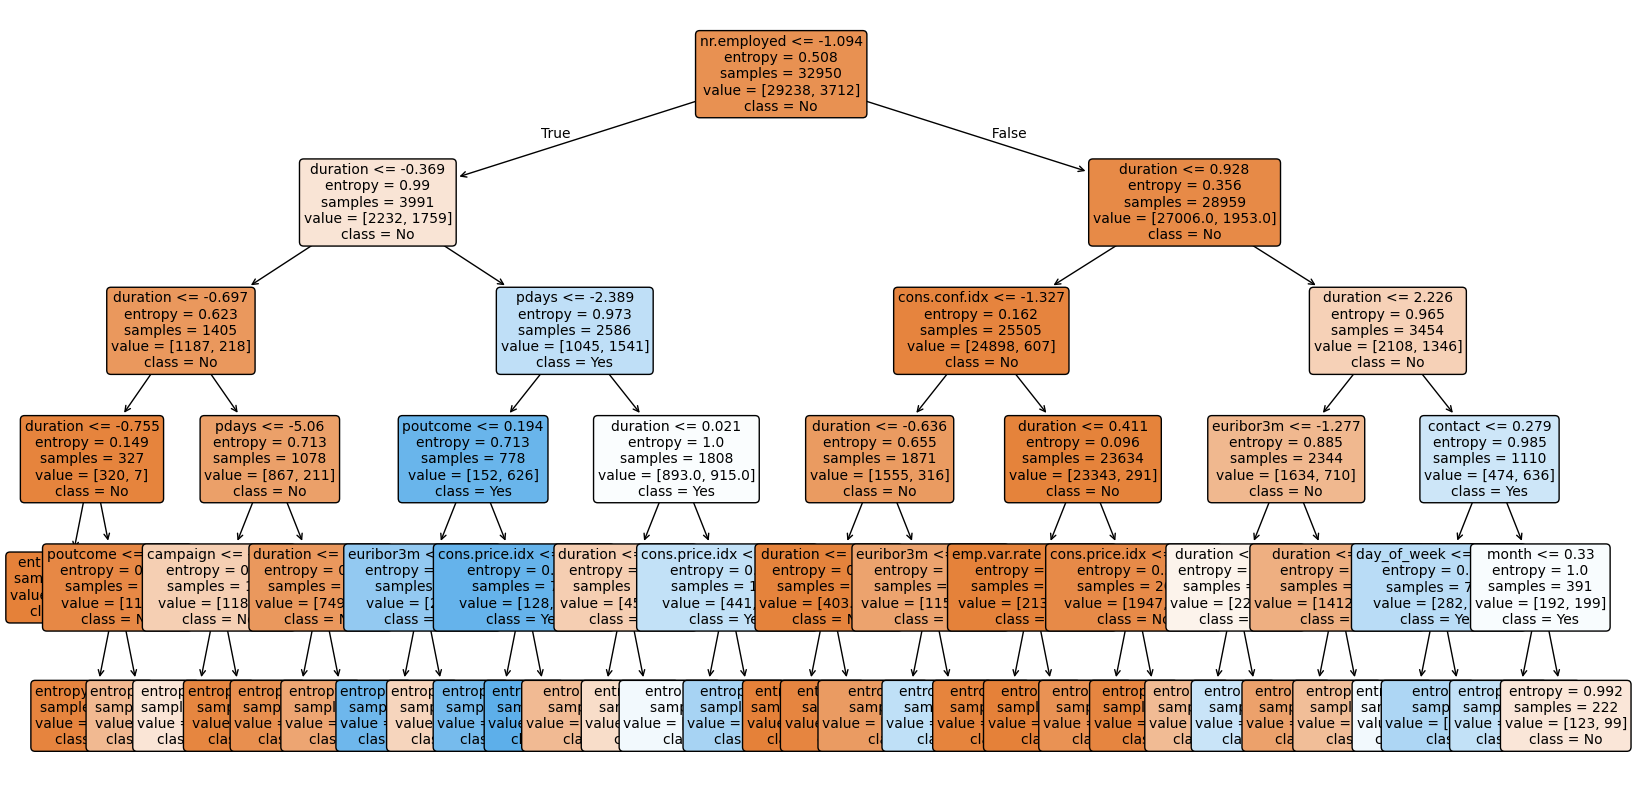

In [32]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.show()
#Visualizing the Decision Tree

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Hyperparameters:", grid_search.best_params_)


C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
321 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [34]:
# Extract best parameters
best_params = grid_search.best_params_

# Train the Decision Tree model using best hyperparameters
optimized_dt = DecisionTreeClassifier(**best_params, random_state=42)
optimized_dt.fit(X_train, y_train)

# Predictions with optimized model
y_pred_optimized = optimized_dt.predict(X_test)

# Evaluate accuracy
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {optimized_accuracy * 100:.2f}%")


Optimized Model Accuracy: 91.81%


C:\Users\Vala Harsh\AppData\Local\Temp\ipykernel_21488\4070694035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm')


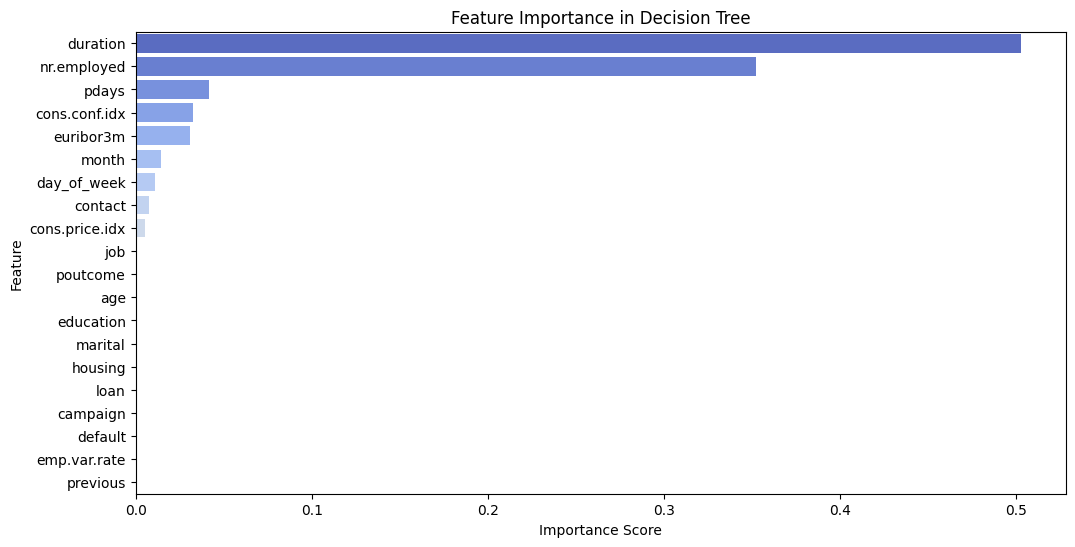

In [35]:
# Extract feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': optimized_dt.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='coolwarm')
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
#Insight: This tells us which features have the biggest impact on whether a customer will purchase.

In [36]:
# Compare performance of original vs optimized model
print("Original Model Accuracy:", round(accuracy * 100, 2), "%")
print("Optimized Model Accuracy:", round(optimized_accuracy * 100, 2), "%")


Original Model Accuracy: 91.76 %
Optimized Model Accuracy: 91.81 %


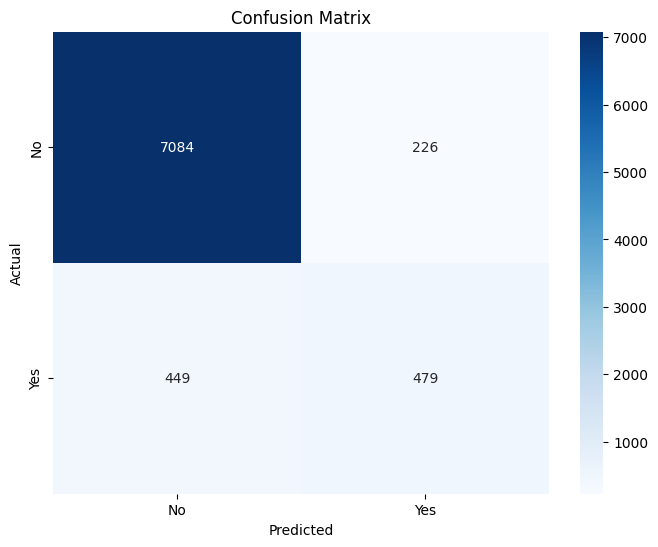

In [45]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
#Insight: This tells us where the model is making mistakes and whether it needs improvement.

C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


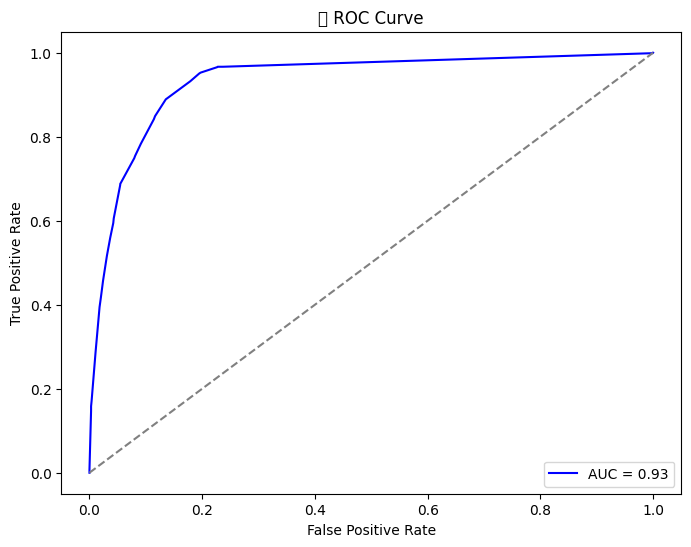

In [40]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
y_probs = optimized_dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend(loc="lower right")
plt.show()
 #Insight: If the AUC (Area Under Curve) is closer to 1, the model is performing well.

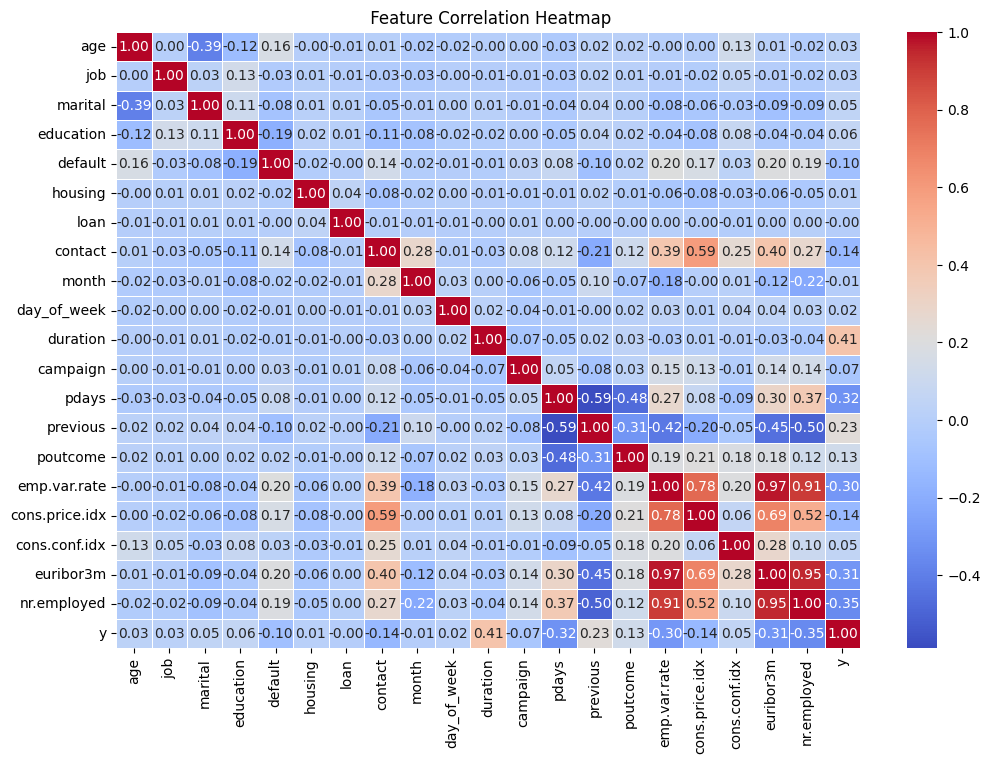

In [44]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(" Feature Correlation Heatmap")
plt.show()
#Insight: Identifying strong correlations can help in deciding which features are redundant and can be removed to avoid overfitting.

C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


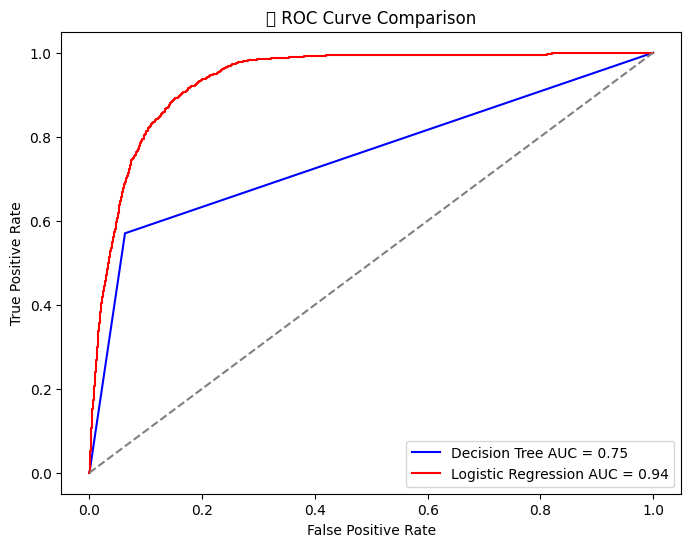

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Train both models
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict probabilities
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both models
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Plot ROC curves for comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree AUC = {auc(fpr_dt, tpr_dt):.2f}')
plt.plot(fpr_lr, tpr_lr, color='red', label=f'Logistic Regression AUC = {auc(fpr_lr, tpr_lr):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔍 ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()
# Insight: This comparison will help you see which model is more effective. Decision Tree might perform better for this task, but testing is key!

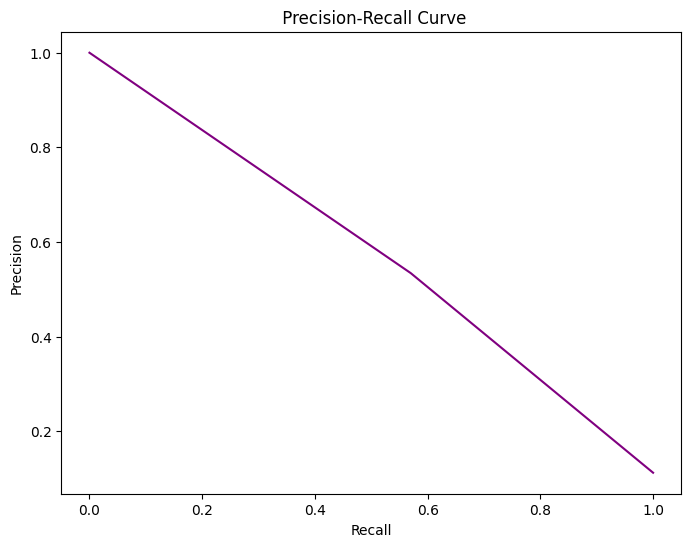

In [48]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for Decision Tree
precision, recall, _ = precision_recall_curve(y_test, y_prob_dt)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(' Precision-Recall Curve')
plt.show()
 #Insight: The precision-recall curve can be useful if the data is imbalanced or if false positives or false negatives are critical.

C:\Users\Vala Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


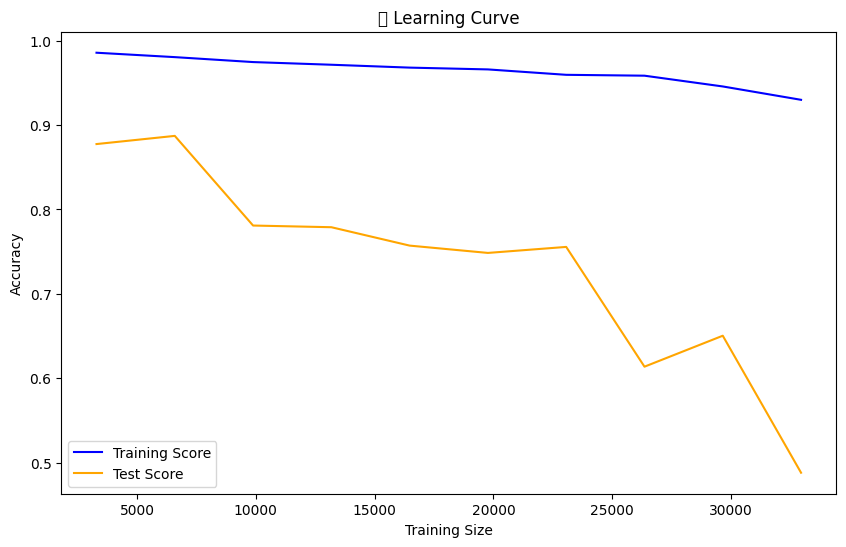

In [50]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(optimized_dt, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score", color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score", color='orange')
plt.title('🛠 Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()
#Insight: If the training and test scores are very different, it may indicate overfitting or underfitting.

